In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [57]:
data_path = './data/ForecastAnalyst_CalgaryDailyEnergyDataset_2023.xlsx'

In [58]:
init_df = pd.read_excel(data_path,sheet_name='Dataset')
init_stats_df = pd.read_excel(data_path,sheet_name='Statistics')
init_corr_df = pd.read_excel(data_path, sheet_name='Correlation')


In [40]:
'''
Commonly, correlations are categorized as follows:
0.00 to 0.19: Very weak or no correlation
0.20 to 0.34: Weak correlation
0.35 to 0.59: Moderate correlation
0.60 to 0.79: Strong correlation
0.80 to 1.00: Very strong correlation
'''

high_correlated_values = init_corr_df[abs(init_corr_df.Energy) >= 0.35]
high_correlated_values

,Unnamed: 0,Energy,EndShift,COVID19,HLight,DLSav,TimeTrend,NYDAY,FAMILYDAY,GOODFRI,...,Sun_Hol,NightDB,MornDB,AfterDB,EvenDB,LagEvenDB,LagHDD1,LagHDD2,LagCDD,December
0,Energy,1.000000,-0.032983,-0.284025,-0.301326,-0.399761,-0.044594,-0.013165,0.017140,-0.061678,...,-0.379268,-0.336893,-0.334273,-0.301426,-0.298100,-0.308257,0.466631,0.463390,0.209642,0.181325
4,DLSav,-0.399761,0.098293,0.066475,0.807891,1.000000,0.058761,-0.075332,-0.075332,0.038036,...,-0.011072,0.662672,0.662044,0.688302,0.704982,0.702617,-0.686054,-0.403435,0.376691,-0.403376
83,LagDep(1),0.745203,-0.033185,-0.285338,-0.300335,-0.398913,-0.041818,0.014779,-0.006151,-0.006937,...,-0.337187,-0.315263,-0.314185,-0.297127,-0.298493,-0.298829,0.483770,0.480693,0.268781,0.185197
86,YR2018_2019_WKDAY,0.394413,0.022877,0.087307,0.007904,0.007320,0.305383,-0.064566,-0.064566,0.028815,...,-0.539956,-0.011047,0.001726,-0.000089,-0.000163,-0.011834,0.007193,-0.002428,-0.019121,-0.019550
87,YR2018_2019_WKEND,-0.511889,0.020008,0.045229,0.003744,0.001440,0.148546,0.072354,0.072354,-0.031931,...,0.598686,0.013818,0.005404,-0.003589,-0.003243,0.007593,-0.007905,-0.007923,0.014672,0.007651
88,Sunday,-0.370822,0.003517,-0.000168,-0.001537,-0.000582,-0.001135,-0.000062,-0.021889,-0.021889,...,0.913497,0.006455,-0.003810,-0.005126,-0.003487,0.002531,-0.006658,-0.012134,0.001340,0.001551
89,Sun_Hol,-0.379268,0.010651,0.000796,-0.010844,-0.011072,-0.000824,0.119577,0.119577,-0.023962,...,1.000000,-0.002042,-0.014008,-0.017291,-0.015111,-0.004872,0.007770,0.011851,0.016488,0.028717
95,LagHDD1,0.466631,-0.103023,-0.099200,-0.662948,-0.686054,-0.085118,0.084927,0.085070,0.006373,...,0.007770,-0.921943,-0.898527,-0.860801,-0.851898,-0.931630,1.000000,0.781914,-0.427719,0.290232
96,LagHDD2,0.463390,-0.043630,-0.072249,-0.329515,-0.403435,-0.037723,0.086264,0.084825,-0.014995,...,0.011851,-0.665986,-0.635875,-0.589353,-0.573260,-0.650327,0.781914,1.000000,-0.167206,0.160080


In [49]:
columns = high_correlated_values['Unnamed: 0'][1:]

In [68]:
data_y = init_df[high_correlated_values['Unnamed: 0'][:]]
data_y

,Energy,DLSav,LagDep(1),YR2018_2019_WKDAY,YR2018_2019_WKEND,Sunday,Sun_Hol,LagHDD1,LagHDD2
0,1106.217621,0,NaN,0,0,1,1,16.595833,0.000000
1,1227.007587,0,1106.217621,0,0,0,1,22.108333,5.108333
2,1317.794971,0,1227.007587,0,0,0,0,29.883333,12.883333
3,1298.445827,0,1317.794971,0,0,0,0,28.591667,11.591667
4,1276.709114,0,1298.445827,0,0,0,0,21.575000,4.575000
...,...,...,...,...,...,...,...,...,...
2483,NaN,1,NaN,1,0,0,0,0.161917,0.000000
2484,NaN,1,NaN,0,1,0,0,0.324042,0.000000
2485,NaN,1,NaN,0,1,1,1,2.222208,0.000000
2486,NaN,1,NaN,1,0,0,0,2.916667,0.000000


In [69]:
data_y = data_y.dropna()

In [ ]:
inputs_y = data_y[columns]
inputs_y

In [71]:
outputs_y = data_y[high_correlated_values['Unnamed: 0'][0]]
outputs_y

1       1227.007587
2       1317.794971
3       1298.445827
4       1276.709114
5       1281.696998
           ...     
2429    1133.337416
2430    1307.781640
2431    1318.788780
2432    1232.871479
2433    1157.525152
Name: Energy, Length: 2401, dtype: float64

In [74]:
output_arr = np.array(outputs_y)
input_arr = np.array(inputs_y)
in_train, in_test, out_train, out_test = train_test_split(input_arr, output_arr, test_size=0.15)

In [83]:
# Define the hyperparameters and their respective values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# Create the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(in_train, out_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(in_test)

# Evaluate the best model
mse = mean_squared_error(out_test, y_pred)
mae = mean_absolute_error(out_test, y_pred)
r2 = r2_score(out_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error: 1832.2435247927635
Mean Absolute Error: 31.02055326802003
R-squared: 0.7920799492884514


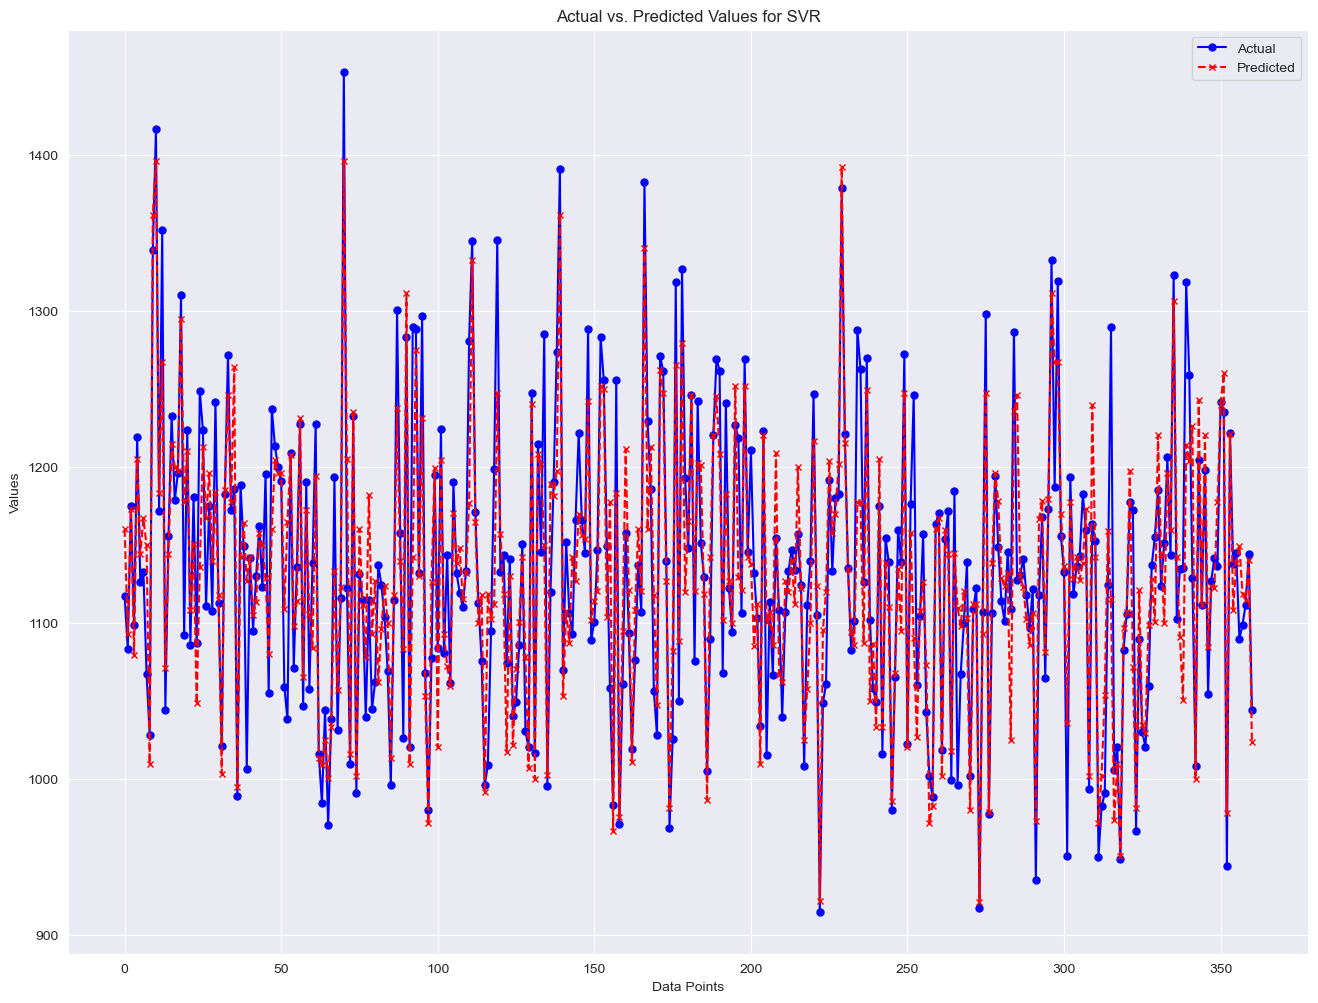

In [84]:
# Assuming y_pred and y_test are your predicted and actual values, you can create a DataFrame for the plot.
# Create a line plot to visualize the actual and predicted values in one dimension
plt.figure(figsize=(16, 12))
x = np.arange(len(out_test))  # Create an array of indices
plt.plot(x, out_test, label='Actual', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(x, y_pred, label='Predicted', color='red', marker='x', linestyle='--', markersize=5)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for SVR')
plt.legend()
plt.show()

Best Hyperparameters: {'C': 10.0, 'epsilon': 0.1}
Mean Squared Error: 4069.679004692883
R-squared: 0.5381793666695177


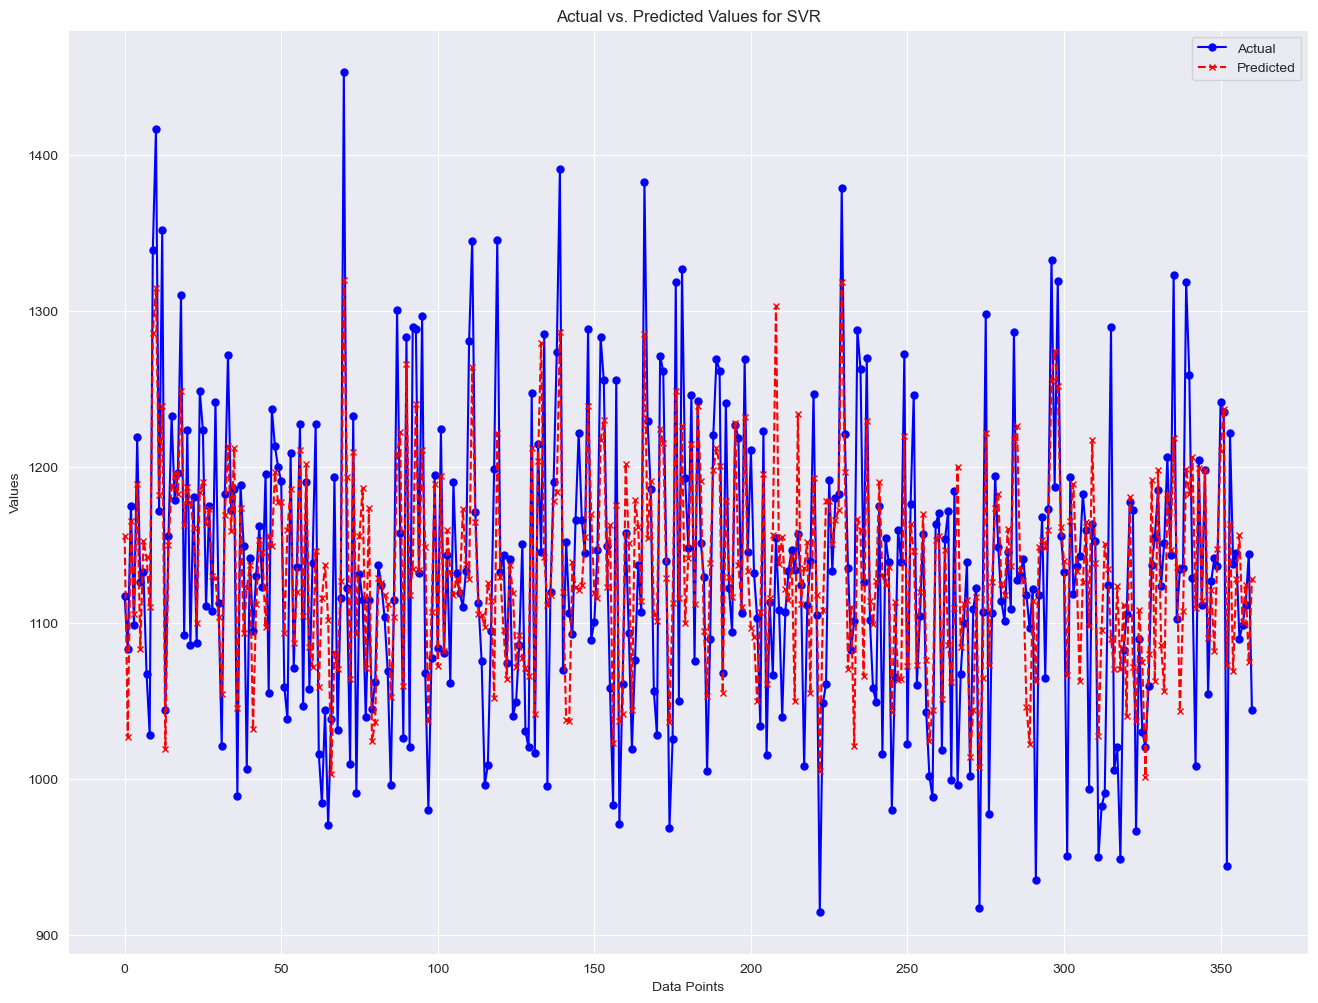

In [82]:
# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.1, 0.2, 0.3],
}

# Create the SVR model
svr = SVR(kernel='rbf')

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(in_train, out_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best SVR model
best_svr = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_svr.predict(in_test)

# Evaluate the best model
mse = mean_squared_error(out_test, y_pred)
r2 = r2_score(out_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Create a line plot to visualize the actual and predicted values in one dimension
plt.figure(figsize=(16, 12))
x = np.arange(len(out_test))  # Create an array of indices
plt.plot(x, out_test, label='Actual', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(x, y_pred, label='Predicted', color='red', marker='x', linestyle='--', markersize=5)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for SVR')
plt.legend()
plt.show()

In [ ]:
summer_df = init_df[(init_df.June==1) | (init_df.July == 1) | (init_df.August == 1)]
summer_df

In [25]:
'''
Commonly, correlations are categorized as follows:
0.00 to 0.19: Very weak or no correlation
0.20 to 0.34: Weak correlation
0.35 to 0.59: Moderate correlation
0.60 to 0.79: Strong correlation
0.80 to 1.00: Very strong correlation
'''
summer_corr = summer_df.corr()
summer_corr = pd.DataFrame(summer_corr)
high_correlated_summer = summer_corr[abs(summer_corr.Energy) >= 0.4]


In [41]:
summer_data = summer_df[high_correlated_summer.index]

In [ ]:
summer_data.Energy.fillna((summer_data.Energy.mean()), inplace=True)

In [ ]:
summer_data

In [44]:
summer_data.isnull().sum()

Energy               0
LagDep(1)            0
YR2018_2019_WKDAY    0
YR2018_2019_WKEND    0
Sunday               0
Sun_Hol              0
NightDB              0
MornDB               0
AfterDB              0
EvenDB               0
LagEvenDB            0
LagCDD               0
dtype: int64

In [45]:
summer_x = summer_data[high_correlated_summer.index[1:]]
summer_y = summer_data.Energy

In [46]:
s_x_arr = np.array(summer_x)
s_y_arr = np.array(summer_y)

In [52]:
s_x_train = s_x_arr[:-92]
s_y_train = s_y_arr[:-92]
s_x_test = s_x_arr[-92:]
s_y_test = s_y_arr[-92:]

In [53]:
# Define the hyperparameters and their respective values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# Create the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(s_x_train, s_y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(s_x_test)

# Evaluate the best model
mse = mean_squared_error(s_y_test, y_pred)
mae = mean_absolute_error(s_y_test, y_pred)
r2 = r2_score(s_y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Mean Squared Error: 1326.3368190363162
Mean Absolute Error: 29.328527712339554
R-squared: 0.8410912596684745


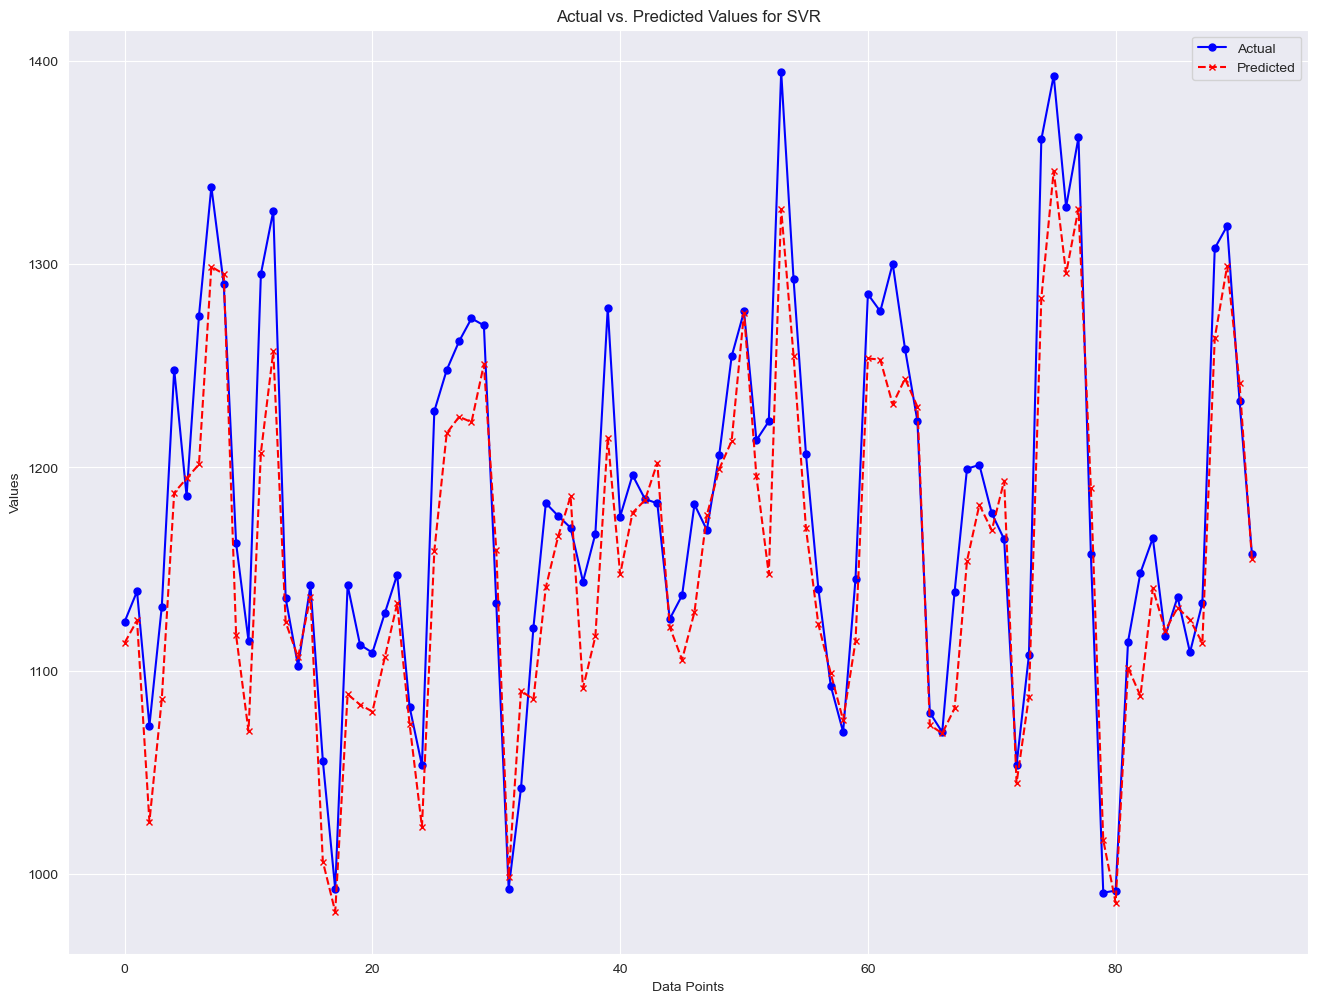

In [54]:
# Assuming y_pred and y_test are your predicted and actual values, you can create a DataFrame for the plot.
# Create a line plot to visualize the actual and predicted values in one dimension
plt.figure(figsize=(16, 12))
x = np.arange(len(s_y_test))  # Create an array of indices
plt.plot(x, s_y_test, label='Actual', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(x, y_pred, label='Predicted', color='red', marker='x', linestyle='--', markersize=5)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for SVR')
plt.legend()
plt.show()

In [ ]:
summer_corr


In [90]:
wend_df = init_df[(init_df['Saturday'] == 1) | (init_df['Sunday'] == 1) | (init_df['Sun_Hol'] == 1)]

In [69]:
wend_corr =  pd.DataFrame(wend_df.corr())
high_correlated_wend = wend_corr[abs(wend_corr.Energy) >= 0.4]


In [101]:
wend_data = wend_df[high_correlated_wend.index]
wend_data.Energy.fillna((wend_data.Energy.mean()), inplace=True)
wend_data['LagDep(1)'].fillna((wend_data['LagDep(1)'].mean()), inplace=True)

/var/folders/x3/3g0yx8_n2sn73g0sd30t1mcc0000gn/T/ipykernel_36977/4160991469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wend_data.Energy.fillna((wend_data.Energy.mean()), inplace=True)
/var/folders/x3/3g0yx8_n2sn73g0sd30t1mcc0000gn/T/ipykernel_36977/4160991469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wend_data['LagDep(1)'].fillna((wend_data['LagDep(1)'].mean()), inplace=True)


In [102]:
wend_data.isnull().sum()

Energy       0
HLight       0
DLSav        0
LagDep(1)    0
NightDB      0
MornDB       0
AfterDB      0
EvenDB       0
LagEvenDB    0
LagHDD1      0
LagHDD2      0
dtype: int64

In [103]:
wend_x = wend_data[wend_data.columns[1:]]
wend_y = wend_data.Energy

In [104]:
wend_x

,HLight,DLSav,LagDep(1),NightDB,MornDB,AfterDB,EvenDB,LagEvenDB,LagHDD1,LagHDD2
0,8.002210,0,1110.673305,-10.283333,-12.033333,-12.033333,-14.083333,-6.116667,16.595833,0.000000
1,8.022236,0,1106.217621,-20.100000,-22.766667,-17.966667,-18.699999,-14.083333,22.108333,5.108333
6,8.146253,0,1281.696998,-16.583333,-16.300001,-16.033334,-17.200001,-15.683334,24.358333,7.358333
7,8.175640,0,1220.852929,-18.049999,-18.499999,-18.149999,-19.316666,-17.200001,26.529167,9.529167
13,8.381376,0,1260.684646,-9.916667,-5.083333,1.500000,3.800000,-8.050000,16.829167,0.000000
...,...,...,...,...,...,...,...,...,...,...
2472,11.136354,1,1030.840293,11.759167,9.814833,23.703667,17.592500,18.703667,0.000000,0.000000
2477,10.818645,1,1110.673305,5.092667,3.425833,10.925833,8.888833,8.611167,2.430583,0.000000
2478,10.755458,1,1110.673305,5.277833,6.574167,14.722333,10.740667,8.888833,2.916708,0.000000
2484,10.379703,1,1110.673305,6.203833,5.648000,11.203833,8.055500,9.537167,0.324042,0.000000


In [105]:
wend_x_train, wend_x_test, wend_y_train, wend_y_test = train_test_split(wend_x, wend_y, test_size=0.1)

In [106]:
# Define the hyperparameters and their respective values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5]
}

# Create the Gradient Boosting Regressor model
model = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(wend_x_train, wend_y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(wend_x_test)

# Evaluate the best model
mse = mean_squared_error(wend_y_test, y_pred)
mae = mean_absolute_error(wend_y_test, y_pred)
r2 = r2_score(wend_y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Mean Squared Error: 644.7995291094651
Mean Absolute Error: 19.692245326586725
R-squared: 0.8810099097600412


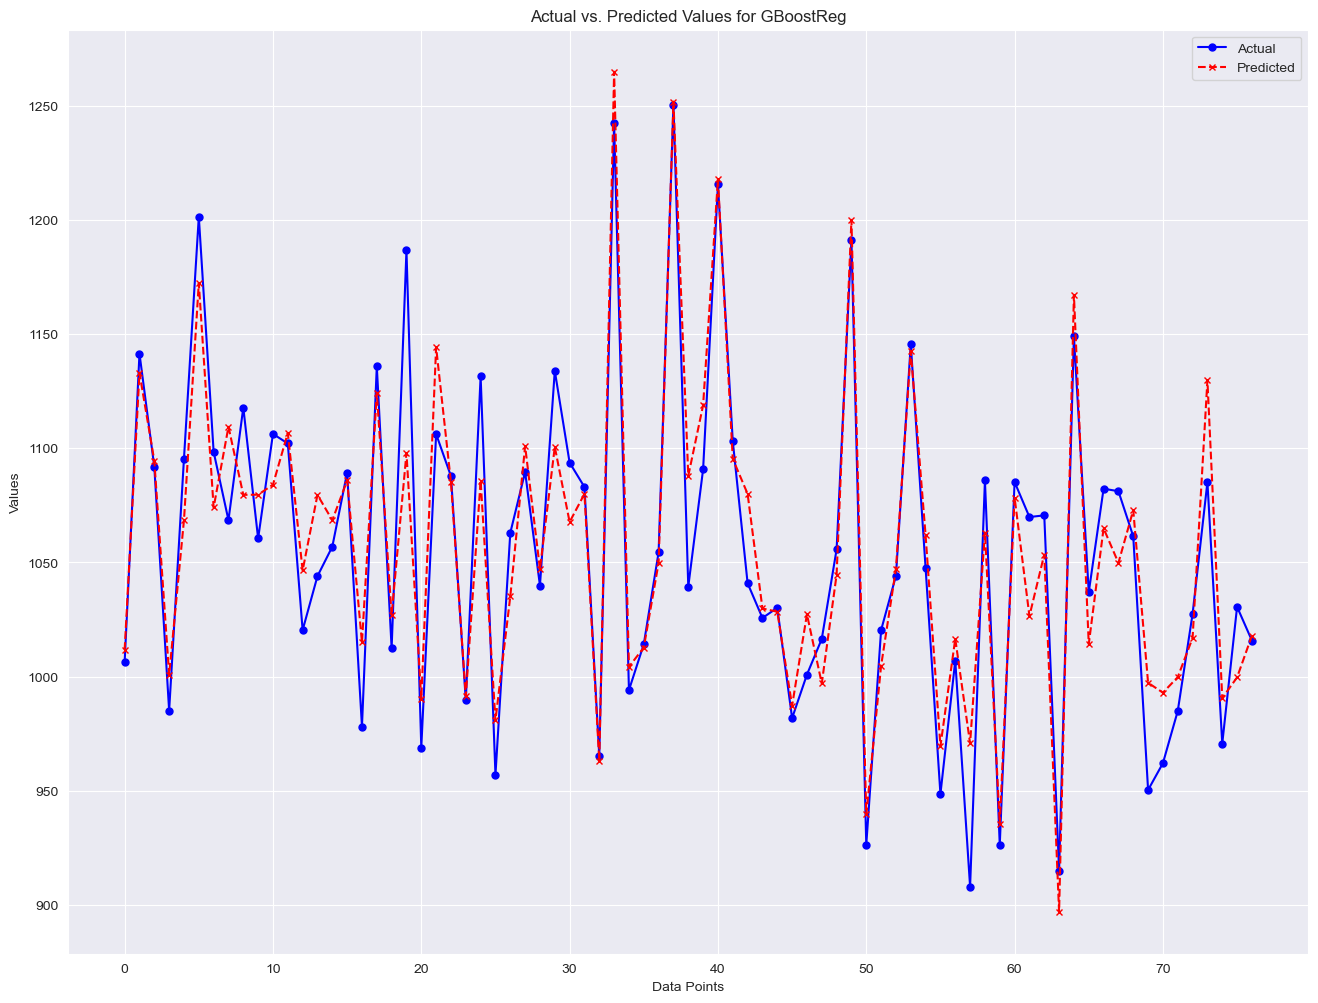

In [108]:
# Assuming y_pred and y_test are your predicted and actual values, you can create a DataFrame for the plot.
# Create a line plot to visualize the actual and predicted values in one dimension
plt.figure(figsize=(16, 12))
x = np.arange(len(wend_y_test))  # Create an array of indices
plt.plot(x, wend_y_test, label='Actual', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(x, y_pred, label='Predicted', color='red', marker='x', linestyle='--', markersize=5)
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values for GBoostReg')
plt.legend()
plt.show()

In [122]:
wend_cov_df = init_df[((init_df['Saturday'] == 1) & (init_df['COVID19'] >= 0.01))| ((init_df['Sunday'] == 1)& (init_df['COVID19'] >= 0.01)) | ((init_df['Sun_Hol'] == 1) & (init_df['COVID19'] >= 0.01))]
wend_cov_corr =  pd.DataFrame(wend_cov_df.corr())
high_correlated_wend_cov = wend_cov_corr[abs(wend_cov_corr.Energy) >= 0.4]
high_correlated_wend_cov

,Year,Month,Day,Energy,EndShift,COVID19,HLight,DLSav,TimeTrend,NYDAY,...,AfterDB,EvenDB,LagEvenDB,LagHDD1,LagHDD2,LagCDD,December,Bad,XMissing,YMissing
Energy,0.322969,0.010056,-0.032319,1.000000,NaN,-0.353323,-0.413813,-0.503395,0.417084,0.009250,...,-0.357468,-0.347039,-0.367092,0.592844,0.517459,0.300014,0.194261,NaN,NaN,NaN
HLight,0.032047,-0.145804,-0.047548,-0.413813,NaN,-0.077035,1.000000,0.827145,-0.063593,-0.136709,...,0.687057,0.729651,0.741307,-0.677494,-0.248143,0.490918,-0.449896,-0.127618,NaN,-0.114179
DLSav,-0.158401,0.020690,-0.005806,-0.503395,NaN,0.030015,0.827145,1.000000,-0.191944,-0.131699,...,0.616165,0.639232,0.674166,-0.665977,-0.321747,0.345187,-0.429465,-0.131699,NaN,-0.057760
TimeTrend,0.851275,-0.129392,0.006142,0.417084,NaN,-0.783572,-0.063593,-0.191944,1.000000,0.022260,...,-0.051671,-0.002167,-0.005357,0.099396,0.097721,0.140107,0.045715,0.002665,NaN,0.047122
February,0.294174,-0.339072,0.029072,0.430628,NaN,-0.108489,-0.238360,-0.405999,0.151730,-0.020416,...,-0.455944,-0.438742,-0.495907,0.578715,0.718376,-0.140146,-0.066575,-0.020416,NaN,-0.028968
LagDep(1),0.271148,0.037890,-0.061207,0.819602,NaN,-0.300030,-0.266033,-0.368138,0.369463,0.028451,...,-0.187658,-0.193385,-0.176253,0.410772,0.388825,0.428339,0.135532,0.056278,NaN,0.008003
LagHDD1,0.198522,-0.240174,0.077044,0.592844,NaN,-0.147729,-0.677494,-0.665977,0.099396,0.084659,...,-0.862340,-0.854048,-0.923759,1.000000,0.696773,-0.419132,0.187562,-0.003639,NaN,-0.012695
LagHDD2,0.216245,-0.264241,-0.040525,0.517459,NaN,-0.070607,-0.248143,-0.321747,0.097721,-0.019397,...,-0.547479,-0.547923,-0.563337,0.696773,1.000000,-0.133152,-0.052715,-0.019397,NaN,-0.027523


In [126]:
print(wend_cov_df.Energy.mean())
print(wend_cov_df.Energy.var())

1021.9137094172722
6398.06445101352


In [127]:
print(wend_df.Energy.mean())
print(wend_df.Energy.var())

1061.0396179378072
5703.986932219422


In [123]:
high_correlated_wend


,Year,Month,Day,Energy,EndShift,COVID19,HLight,DLSav,TimeTrend,NYDAY,...,AfterDB,EvenDB,LagEvenDB,LagHDD1,LagHDD2,LagCDD,December,Bad,XMissing,YMissing
Energy,0.006685,-0.060152,-0.047635,1.000000,0.034188,-0.320353,-0.472925,-0.569970,-0.002538,0.068753,...,-0.493316,-0.478978,-0.483573,0.655482,0.584770,0.148160,0.296613,NaN,0.021021,NaN
HLight,0.062452,-0.098307,-0.024164,-0.472925,-0.016612,0.078860,1.000000,0.806488,0.047254,-0.141852,...,0.712207,0.739326,0.739459,-0.661595,-0.321226,0.538522,-0.444221,-0.060063,-0.063240,-0.048531
DLSav,0.054799,0.132886,0.015495,-0.569970,0.113989,0.062636,0.806488,1.000000,0.073669,-0.134364,...,0.687861,0.703043,0.699454,-0.683065,-0.376836,0.384780,-0.418839,0.001277,0.023666,0.097287
LagDep(1),-0.030082,-0.048388,-0.037601,0.782706,-0.032272,-0.275335,-0.334334,-0.424461,-0.037450,0.056067,...,-0.321118,-0.314071,-0.327540,0.511546,0.486917,0.238695,0.223217,-0.001111,NaN,-0.025846
NightDB,0.105066,0.211547,-0.013911,-0.507965,0.108068,0.062559,0.692602,0.650650,0.135228,-0.131650,...,0.921951,0.904446,0.974379,-0.918938,-0.665863,0.623767,-0.292786,0.026451,-0.004391,0.033341
MornDB,0.103638,0.204065,-0.021403,-0.519989,0.093541,0.106487,0.710527,0.651126,0.132614,-0.122587,...,0.959177,0.939576,0.950769,-0.896240,-0.637760,0.605080,-0.294985,0.014339,-0.014754,0.015964
AfterDB,0.116546,0.192332,-0.010316,-0.493316,0.115158,0.066198,0.712207,0.687861,0.143923,-0.099420,...,1.000000,0.983364,0.921491,-0.861081,-0.577107,0.584049,-0.327957,0.017514,-0.010766,0.045526
EvenDB,0.114246,0.173664,-0.001302,-0.478978,0.109239,0.034448,0.739326,0.703043,0.139006,-0.078343,...,0.983364,1.000000,0.907231,-0.844149,-0.546551,0.583955,-0.335811,0.014290,-0.012369,0.038898
LagEvenDB,0.101284,0.192181,-0.022322,-0.483573,0.110876,0.048342,0.739459,0.699454,0.128478,-0.141778,...,0.921491,0.907231,1.000000,-0.929859,-0.646847,0.666077,-0.316881,0.017506,-0.003975,0.033206
LagHDD1,-0.090658,-0.215737,-0.008099,0.655482,-0.111335,-0.087428,-0.661595,-0.683065,-0.121671,0.156213,...,-0.861081,-0.844149,-0.929859,1.000000,0.782905,-0.431836,0.314330,-0.043491,-0.019813,-0.046959


In [121]:
wend_cov_df

,Year,Month,Day,Energy,EndShift,COVID19,HLight,DLSav,TimeTrend,NYDAY,...,AfterDB,EvenDB,LagEvenDB,LagHDD1,LagHDD2,LagCDD,December,Bad,XMissing,YMissing
0,2017,1,1,1106.217621,0,0.0,8.002210,0,731,0,...,-12.033333,-14.083333,-6.116667,16.595833,0.000000,0.000000,0,0,1,0
6,2017,1,7,1220.852929,0,0.0,8.146253,0,737,0,...,-16.033334,-17.200001,-15.683334,24.358333,7.358333,0.000000,0,0,0,0
7,2017,1,8,1222.755134,0,0.0,8.175640,0,738,0,...,-18.149999,-19.316666,-17.200001,26.529167,9.529167,0.000000,0,0,0,0
13,2017,1,14,1139.634355,0,0.0,8.381376,0,744,0,...,1.500000,3.800000,-8.050000,16.829167,0.000000,0.000000,0,0,0,0
14,2017,1,15,1105.375885,0,0.0,8.420249,0,745,0,...,5.450000,2.233333,3.800000,12.425000,0.000000,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,2023,10,8,NaN,1,0.0,11.200186,1,3202,0,...,23.981500,18.703667,15.370500,0.000000,0.000000,0.912042,0,0,0,1
2477,2023,10,14,NaN,1,0.0,10.818645,1,3208,0,...,10.925833,8.888833,8.611167,2.430583,0.000000,0.000000,0,1,1,1
2478,2023,10,15,NaN,1,0.0,10.755458,1,3209,0,...,14.722333,10.740667,8.888833,2.916708,0.000000,0.000000,0,1,1,1
2484,2023,10,21,NaN,1,0.0,10.379703,1,3215,0,...,11.203833,8.055500,9.537167,0.324042,0.000000,0.000000,0,1,1,1
